# Climate Temperature Change 1991 - 2016


I wanted to experiment with the climate change temperature public data and clean it in order to get the most of it.
The data is found in the following link:

https://climateknowledgeportal.worldbank.org/download-data

It shows climate change data with the variable = temperature for all the countries between 1991 - 2016.
In this notebook I will provide functions to clean the data so data scientists can visualize it and take the most of it.

## The steps I followed:

- Dispalying the data
- Cleaning the names of the columns using basic NLP functions
- Spliting the data into data frames by year or by country
- Visualizing examples of those data frames using Seaborn 


In [17]:
import pandas as pd
import seaborn as sns

In [18]:
df = pd.read_csv('C:/Users/Sarah/Downloads/climate_data_temp_91_16_all.csv', error_bad_lines=False)

b'Skipping line 3434: expected 5 fields, saw 6\nSkipping line 3435: expected 5 fields, saw 6\nSkipping line 3436: expected 5 fields, saw 6\nSkipping line 3437: expected 5 fields, saw 6\nSkipping line 3438: expected 5 fields, saw 6\nSkipping line 3439: expected 5 fields, saw 6\nSkipping line 3440: expected 5 fields, saw 6\nSkipping line 3441: expected 5 fields, saw 6\nSkipping line 3442: expected 5 fields, saw 6\nSkipping line 3443: expected 5 fields, saw 6\nSkipping line 3444: expected 5 fields, saw 6\nSkipping line 3445: expected 5 fields, saw 6\nSkipping line 3446: expected 5 fields, saw 6\nSkipping line 3447: expected 5 fields, saw 6\nSkipping line 3448: expected 5 fields, saw 6\nSkipping line 3449: expected 5 fields, saw 6\nSkipping line 3450: expected 5 fields, saw 6\nSkipping line 3451: expected 5 fields, saw 6\nSkipping line 3452: expected 5 fields, saw 6\nSkipping line 3453: expected 5 fields, saw 6\nSkipping line 3454: expected 5 fields, saw 6\nSkipping line 3455: expected 5 f

In [19]:
df.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03110,1991,Jan Average,Afghanistan,AFG
1,1.43654,1991,Feb Average,Afghanistan,AFG
2,6.88685,1991,Mar Average,Afghanistan,AFG
3,12.93970,1991,Apr Average,Afghanistan,AFG
4,17.07550,1991,May Average,Afghanistan,AFG


In [20]:
df.dtypes

Temperature - (Celsius)    float64
 Year                        int64
 Statistics                 object
 Country                    object
 ISO3                       object
dtype: object

In [21]:
df.columns

Index(['Temperature - (Celsius)', ' Year', ' Statistics', ' Country', ' ISO3'], dtype='object')

In [22]:
df.columns = df.columns.str.replace(' ', '')

In [23]:
df.columns

Index(['Temperature-(Celsius)', 'Year', 'Statistics', 'Country', 'ISO3'], dtype='object')

In [24]:
df = df.rename(columns={'Temperature-(Celsius)': 'Temp'})

In [25]:
df.columns

Index(['Temp', 'Year', 'Statistics', 'Country', 'ISO3'], dtype='object')

In [26]:
df['Statistics'].value_counts()

 Jun Average    4966
 Nov Average    4966
 Feb Average    4966
 Mar Average    4966
 Jan Average    4966
 Sep Average    4966
 Aug Average    4966
 Apr Average    4966
 May Average    4966
 Oct Average    4966
 Jul Average    4966
 Dec Average    4966
Name: Statistics, dtype: int64

In [27]:
df = df.rename(columns={'Statistics': 'Month'})

In [28]:
def monthToNum(shortMonth):

    return {
            'jan' : 1,
            'feb' : 2,
            'mar' : 3,
            'apr' : 4,
            'may' : 5,
            'jun' : 6,
            'jul' : 7,
            'aug' : 8,
            'sep' : 9, 
            'oct' : 10,
            'nov' : 11,
            'dec' : 12
    }[shortMonth]


In [29]:
for i in range(len(df.Month)):
    df.Month.iloc[i] = df.Month.iloc[i].lower() # Transformer en minuscule
    df.Month.iloc[i] = df.Month.iloc[i].replace("average" , "") # remove average
    df.Month.iloc[i]  = df.Month.iloc[i].replace(' ', '')
    df.Month.iloc[i]  = monthToNum(df.Month.iloc[i])
    df.Country.iloc[i]  = df.Country.iloc[i].replace(' ', '')
    df.ISO3.iloc[i]  = df.ISO3.iloc[i].replace(' ', '')
    

C:\Users\Sarah\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [16]:
df.head()

,Temp,Year,Month,Country,ISO3
0,-0.03110,1991,1,Afghanistan,AFG
1,1.43654,1991,2,Afghanistan,AFG
2,6.88685,1991,3,Afghanistan,AFG
3,12.93970,1991,4,Afghanistan,AFG
4,17.07550,1991,5,Afghanistan,AFG


We can merge the two variables ISO3 and Country

In [30]:
df.Country.value_counts()

Oman                          312
Colombia                      312
St.VincentandtheGrenadines    312
Iran                          312
Panama                        312
                             ... 
Kiribati                      312
BosniaandHerzegovina          312
Algeria                       312
ElSalvador                    312
Yemen                         312
Name: Country, Length: 191, dtype: int64

In [31]:
def by_country(df, country_code):

    filter_country = df["ISO3"]== country_code
    df_country_code = df.where(filter_country)
    df_country_code = df_country_code.dropna()
    #df_country_code= df_country_code.set_index(['Year'])
    df_country_code['Year'] = df_country_code['Year'].astype(str)
    return df_country_code 


In [32]:
def by_year(df, year):

    filter_year = df['Year']== year
    df_year = df.where(filter_year)
    df_year = df_year.dropna()
    
    return df_year

In [34]:
df_USA = by_country(df, 'USA')

In [80]:
df_USA.dtypes

Temp       float64
Year        object
Month       object
Country     object
ISO3        object
dtype: object

In [36]:
df_USA['Temp'].shape

(312,)

<AxesSubplot:xlabel='Year', ylabel='Temp'>

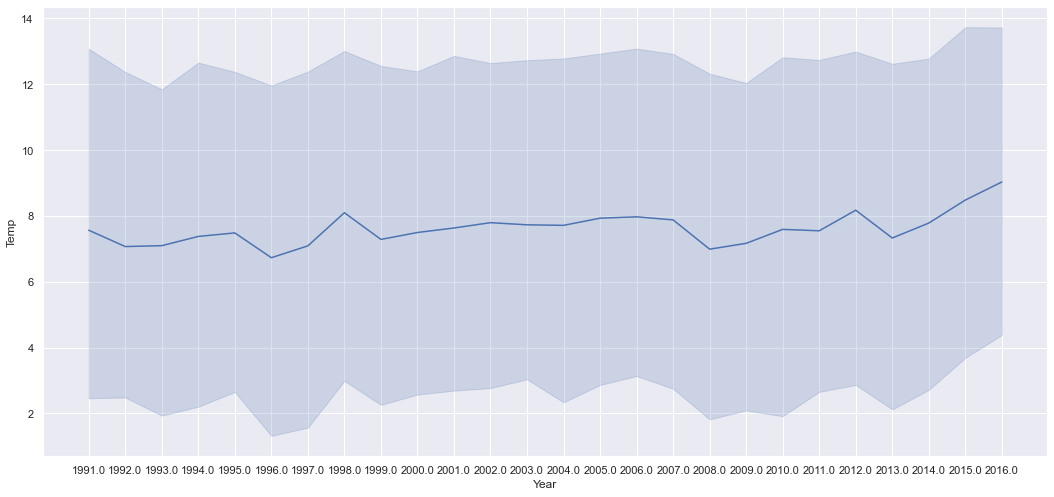

In [37]:
sns.set(rc={'figure.figsize':(18,8.27)})
sns.lineplot(data=df_USA, x="Year", y="Temp")


<AxesSubplot:xlabel='Month', ylabel='Temp'>

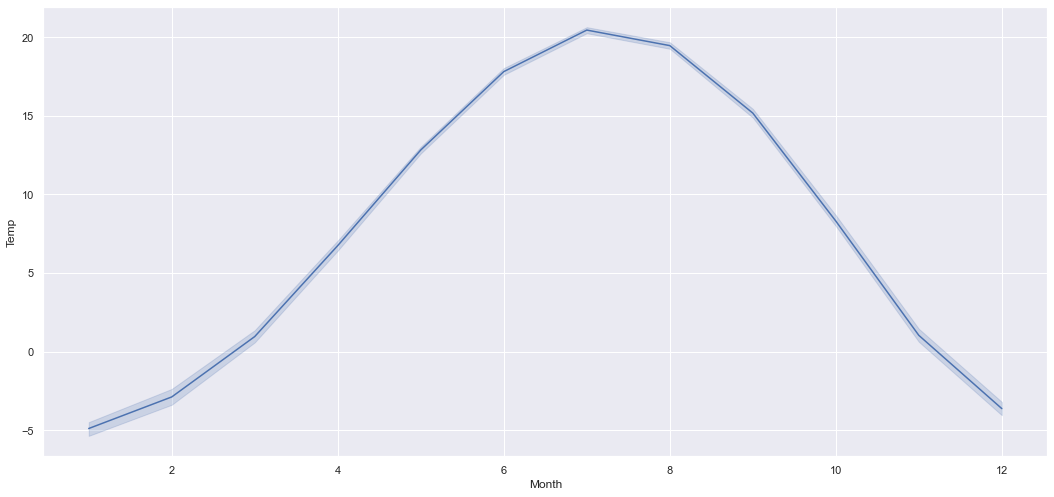

In [38]:
sns.set(rc={'figure.figsize':(18,8.27)})
sns.lineplot(data=df_USA, x="Month", y="Temp")

In [59]:
df_1991= by_year(df, 1991)
df_2016= by_year(df, 2016)

In [60]:
df_1991

,Temp,Year,Month,Country,ISO3
0,-0.03110,1991.0,1,Afghanistan,AFG
1,1.43654,1991.0,2,Afghanistan,AFG
2,6.88685,1991.0,3,Afghanistan,AFG
3,12.93970,1991.0,4,Afghanistan,AFG
4,17.07550,1991.0,5,Afghanistan,AFG
...,...,...,...,...,...
59287,18.55500,1991.0,8,Zimbabwe,ZWE
59288,22.74690,1991.0,9,Zimbabwe,ZWE
59289,24.40560,1991.0,10,Zimbabwe,ZWE
59290,24.58750,1991.0,11,Zimbabwe,ZWE


<AxesSubplot:xlabel='Month', ylabel='Temp'>

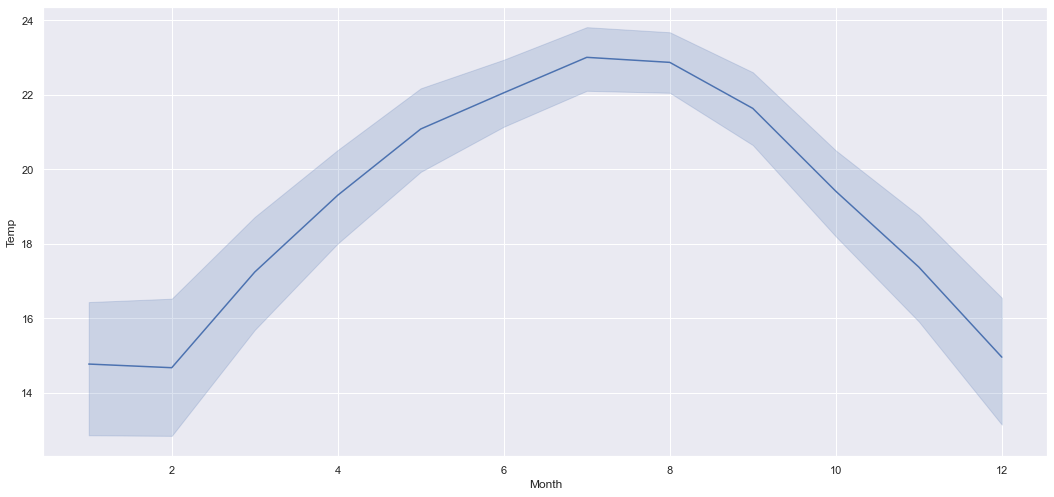

In [41]:
sns.set(rc={'figure.figsize':(18,8.27)})
sns.lineplot(data=df_1994, x="Month", y="Temp")

<AxesSubplot:xlabel='Temp'>

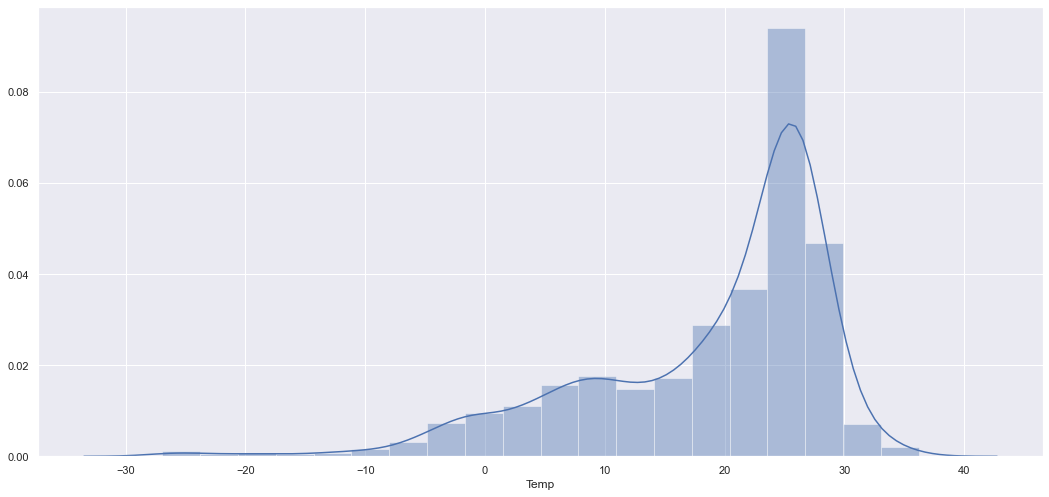

In [74]:
sns.distplot(df_1991['Temp'],bins = 20)

<AxesSubplot:xlabel='Temp'>

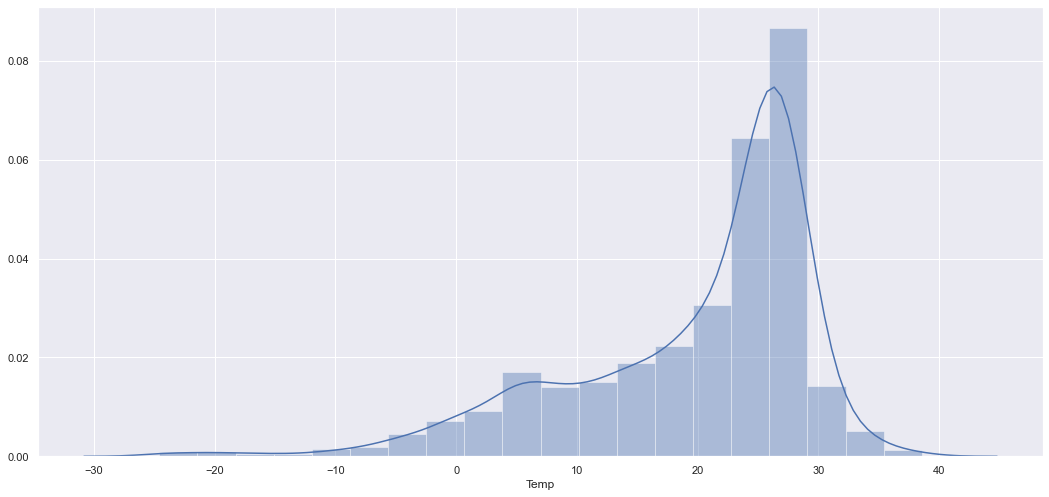

In [76]:
sns.distplot(df_2016['Temp'],bins = 20)

In [ ]:
sns 

In [63]:
plt.hist?